<a href="https://colab.research.google.com/github/anesgh58/MIR-DDRM/blob/main/MIR_DDRM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd ..
%rm -r MIR-DDRM

In [ ]:

from getpass import getpass
from google.colab import drive

# drive.mount('/content/drive')

# Prompt for the token securely
token = getpass('Enter your GitHub token:')

# Clone the repository using the token in the URL
!git clone https://{token}@github.com/anesgh58/MIR-DDRM.git

In [ ]:
# Move to repo
%cd MIR-DDRM

# make sure that repo is up to date
# ! git stash
! git pull

/content/MIR-DDRM
Already up to date.


In [ ]:
!python main.py --ni --config imagenet_512_cc.yml --doc imagenet_ood --timesteps 20 --eta 0.85 --etaB 1 --deg deblur_bccb --sigma_0 0 -i deblur_imgnet_sigma_0

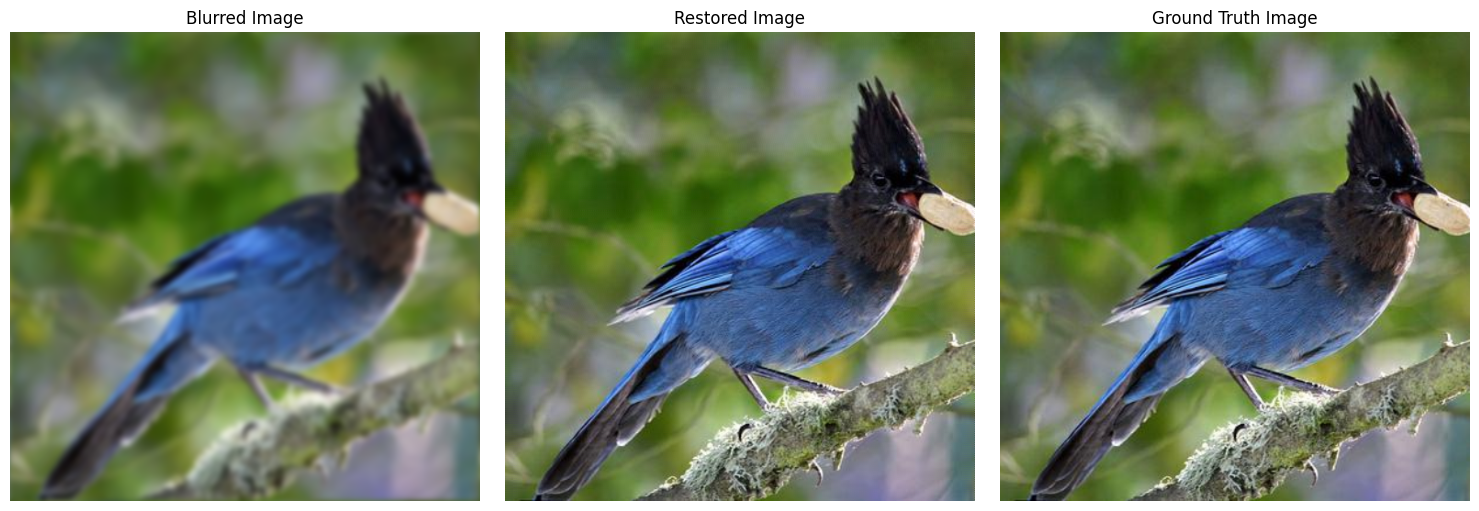

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the paths to your image files
image_path_restored = 'exp/image_samples/deblur_imgnet_sigma_0/0_-1.png'
image_path_GT = 'exp/image_samples/deblur_imgnet_sigma_0/orig_0.png'
image_path_blurred = 'exp/image_samples/deblur_imgnet_sigma_0/y0_0.png'

# Create a figure to hold the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# List of images and titles
images = [(image_path_blurred, "Blurred Image"),
          (image_path_restored, "Restored Image"),
          (image_path_GT, "Ground Truth Image")]

# Loop through the images and display them
for ax, (image_path, title) in zip(axes, images):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    ax.set_title(title)

plt.tight_layout()  # Adjust layout
plt.show()